# **Importing the database**

In [2]:
import os
import tarfile
from six.moves import urllib

#Variables
file_path = os.path.join(".")
file_name = "OlsenVeg.csv"
file_url ="https://raw.githubusercontent.com/octokami/PredictiveBiomeModelling/master/OlsenVeg.csv"

#Import
def fetch_file_data(file_url, file_path):
  os.makedirs(file_path, exist_ok=True)
  csv_path = os.path.join(file_path, file_name)
  urllib.request.urlretrieve(file_url, csv_path)
fetch_file_data(file_url, file_path)


# **Descriptive Statistics**

In [3]:
    import pandas as pd
    import numpy as np

    # Load the csv using pandas
    df = pd.read_csv(file_name)

    pollen_only = df.iloc[:, 9:]
    pollen_matrix = pollen_only.values
    all_data=pollen_matrix.reshape(pollen_matrix.shape[0]*pollen_matrix.shape[1],1)
    all_data.shape
    data=all_data

    #Mean
    mean=data.mean()
    
    #Median
    #median=data.median()

    #Standard Deviation
    sd=data.std()

    #Max
    max = data.max()

    #Min
    min = data.min()

    print("The mean is ", round(mean,2)," with standard deviation ", round(sd,2),".\nThe maximum value is ", round(max,2), " and the minimum value is ", round(min,2))


The mean is  0.84  with standard deviation  5.57 .
The maximum value is  99.8  and the minimum value is  0.0


In [ ]:
df.describe(include='all')

,OSN,LAT,LONG,ALT,SDMT,BIO_N,BIO_C,BRG_N,BRG_C,ACANTHACEA,AIZOACEAE,AMARANTHAC,LANNEA_SCL,ILEX_MITIS,AMBROSIEAE,ARTEMISIA,STOEBE,SENECIO,TARCHONANT,AVICENNIA,BALANITES,CAESALPINI,CAPPARIDAC,CLUSIACEAE,COMBRETACE,CONNARACEA,AFROCRANIA,CUPRESSACE,CYPERACEAE,DIDIERACEA,DILLENIACE,EPHEDRA,ERICACEAE,ALCHORNEA,BRIDELIA,CHROZOPHOR,DRYPETES_T,MACARANGA_,FLUEGGEA_T,TETRORCHID,...,DODONAEA,SAPOTACEAE,COLA_TYPE,TAMARIX,CHRISTIANA,TILIA_TYPE,TRIBULUS,CELTIS,HOLOPTELEA,URTICACEAE,FAGONIA,ZYGOPHYLLU,MICRODESMI,TYPHA,ASTERACEAE,CONYZA_TYP,ACALYPHA,NYMPHAEA,EUPHORBIA_,RHUS_TYPE,PHOENIX,EUCALYPTUS,PINUS,HELICHRYSU,SPERMACOCE,FABACEAE_U,PLANTAGO,EUPHORBIAC,EUCLEA,CICHORIEAE,RUBIACEAE_,INDIGOFERA,TREMA_TYPE,CARYOPHYLL,PULICARIA_,RUMEX,BRASSICACE,APIACEAE,LAMIACEAE,PTERIDOPHY
count,1125.000000,1125.000000,1125.000000,1125.000000,1125,1125,1125.000000,1125,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,...,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
unique,NaN,NaN,NaN,NaN,6,9,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Surface,"Tropical and subtropical grasslands, savannas,...",NaN,West Sudanian savanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,733,415,NaN,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,604.001778,0.589111,22.338368,885.884444,NaN,NaN,6.996444,NaN,12.764444,0.855915,1.258494,5.772757,0.251929,0.122584,0.035805,0.248192,0.240044,0.229223,0.553583,0.030812,0.111299,0.698787,0.648404,0.079171,2.560980,0.009723,0.007560,0.324270,11.488577,0.000946,0.060475,0.058674,0.966754,1.166538,0.077436,0.002067,0.009521,1.042253,0.074083,0.111507,...,0.222662,0.211696,0.006702,0.114498,0.000278,0.039131,0.255224,1.255541,0.030657,0.409174,0.095889,0.195005,2.272979,1.722490,3.816024,0.348962,0.502211,0.259248,0.478081,0.529209,0.679849,0.286026,0.311390,0.272747,0.231813,0.240880,0.318003,0.274287,0.201126,0.277678,0.204184,0.137598,0.175985,0.115217,0.082457,0.096863,0.222361,0.106152,0.258078,8.109494
std,342.619356,14.874613,18.903639,955.706409,NaN,NaN,4.358489,NaN,7.522480,2.815081,7.644444,12.269203,1.779522,2.008673,0.671671,1.083127,2.585789,1.910025,4.933325,0.350799,0.934690,3.053508,3.466718,1.153928,7.377402,0.122185,0.173784,1.960117,16.897292,0.031717,0.799662,0.775460,6.048571,4.414389,0.360555,0.027097,0.114735,5.122095,0.665114,0.962803,...,1.007090,0.974597,0.146901,0.793930,0.009317,0.888378,1.292281,5.789085,0.345392,1.964867,1.068237,2.070978,10.666095,6.015554,9.369661,2.818956,3.16

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Columns: 128 entries, OSN to PTERIDOPHY
dtypes: float64(122), int64(3), object(3)
memory usage: 1.1+ MB


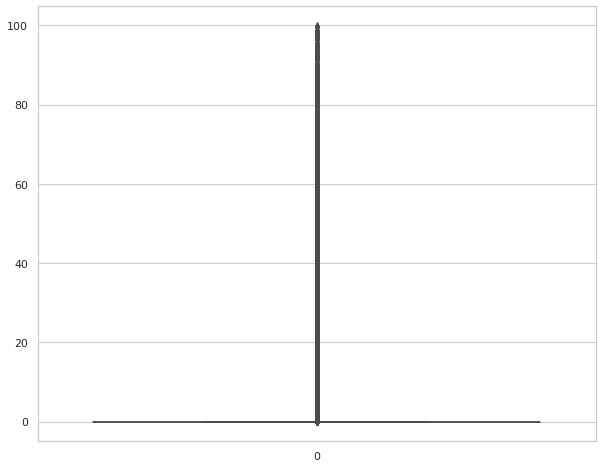

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))

#Box Plot
ax = sns.boxplot(data=all_data, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


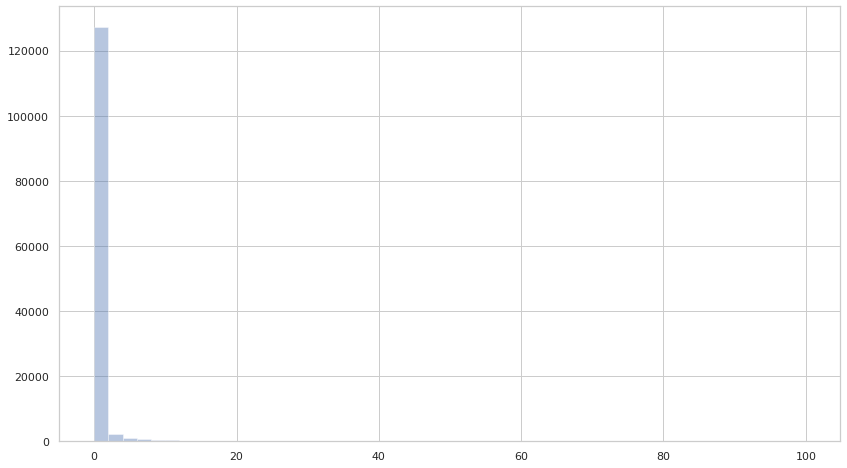

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(all_data, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


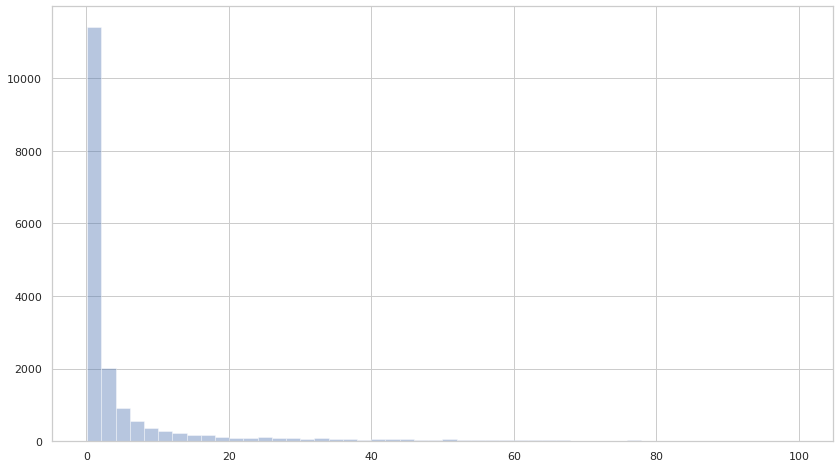

In [ ]:
filter_data = all_data[all_data>0.1]
plt.figure(figsize=(14,8))
sns.distplot(filter_data, kde=False)

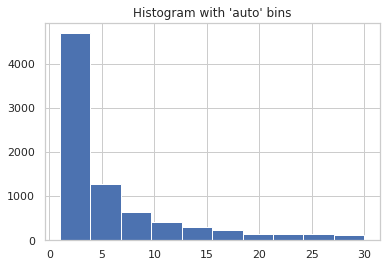

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
rng = all_data 
_ = plt.hist(all_data, density=False, bins=10, range=(1,30))  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

In [4]:
    #Minimum number of rows to keep
    min_rows=10
    #Removing taxas where the sum for the whole database is less than the threshold
    threshold=3

    categories='BIO_N'
    df[categories].value_counts()

    #labels = [cat.categories, len(x)]

Tropical and subtropical grasslands, savannas, and shrublands    415
Tropical and Subtropical Moist Broadleaf Forests                 314
Deserts and Xeric Shrublands                                     239
Montane Grasslands and Shrublands                                120
Flooded Grasslands and Savannas                                   21
Temperate Grasslands, Savannas, and Shrublands                     8
Mediterranean Forests, Woodlands, and Scrub                        4
Mangroves                                                          3
Tropical and Subtropical Dry Broadleaf Forests                     1
Name: BIO_N, dtype: int64

In [ ]:
order = pollen_matrix.sum(axis=0).sort()